
# *Analyzing Personality Traits in Resumes Using the Big Five Personality Model*

<center>
    <h2>Project Proposal</h2>
</center>



# 1. Aims, Objectives, and Background

# 1.1 Introduction

The Big Five Personality Model, widely regarded as the standard framework in psychology, offers a robust method for understanding individual behavior across five traits: **openness**, **conscientiousness**, **extraversion**, **agreeableness**, and **neuroticism**. While this model has been applied in contexts like social media, literature, and spoken language, its application to resumes, a highly structured and professional form of self-representation, remains underexplored.

Resumes reflect an individual's personality in the way they highlight achievements, frame experiences, and communicate aspirations. This project seeks to bridge psychology, linguistics, and data science by analyzing linguistic features in resumes to infer Big Five traits. The insights gained from such an analysis can provide actionable recommendations for **recruitment**, **career counseling**, and even **professional development**.

This project draws inspiration from existing work in computational linguistics but takes a novel approach by focusing on professional texts. Unlike casual language in social media, resumes are written with precision and purpose, making them an ideal subject for analyzing how individuals express personality traits in a professional context.

To my knowledge, there is no comprehensive study analyzing personality traits in resumes across industries using the Big Five Model. This gap in the literature underscores the relevance and novelty of this project.


# 1.2 Aims and Objectives

This project aims to explore personality expression in resumes by leveraging the Big Five Personality Model. Specifically, it addresses the following objectives:

## Creating Measures of Personality Traits
- Using keyword-based mapping and sentiment analysis to infer traits like openness and agreeableness.
- Combining vocabulary richness and linguistic tone to measure traits effectively.

## Analyzing Personality Variations
- Identifying how personality traits vary across industries such as creative, technical, and management roles.
- Exploring correlations between traits, such as whether high openness aligns with high extraversion.

## Uncovering Patterns Across Job Types
- Comparing creative versus technical roles to understand how linguistic choices reflect different professional environments.

## Visualizing Insights
- Providing clear and accessible visualizations to make findings understandable to both technical and non-technical audiences.

### Specific Aims
- To determine the quantity of data required to conduct a meaningful analysis while considering time and resource constraints.
- To preprocess and clean resume data for effective application of Natural Language Processing (NLP) techniques.
- To conduct exploratory data analysis (EDA) to ensure trends within the data justify further investigation.


# 1.3 Data

## 1.3.1 Data Requirements
The resume dataset was chosen for its rich linguistic and professional content, ideal for mapping personality traits using the Big Five Personality Model. Ensuring diverse representation across job categories like creative, technical, and managerial roles was a priority to analyze linguistic patterns reflective of professional environments. The dataset was processed to focus on text-based features while excluding multimedia elements like visual designs or formatting. Such constraints ensure that linguistic analysis remains consistent and unbiased.

A balanced representation of data across job categories was emphasized. While the word count varied between resumes, the data preparation ensured that key linguistic features such as sentiment, vocabulary richness, and trait-associated keywords were analyzed uniformly. This approach avoids over-representation of any single category, maintaining the fairness and accuracy of findings.

## 1.3.2 Choice of Data
The dataset includes resumes from a range of professional domains to capture linguistic diversity. Each resume's content was thoroughly cleaned and standardized to enable effective text analysis. Special focus was placed on maintaining the linguistic essence of the resumes while removing artifacts like special characters, stopwords, and duplicates.

## 1.3.3 Data Cleaning and Preprocessing Methodology
The data underwent a systematic cleaning and preprocessing pipeline. Initially, HTML tags and non-linguistic artifacts were removed to ensure the data was solely textual. Duplicate resumes and missing values were handled, providing a uniform dataset for analysis. Tokenization, stopword removal, and lemmatization techniques further refined the dataset, making it suitable for mapping personality traits. This step ensured that only meaningful linguistic features contributed to the analysis.

## 1.3.4 Limitations and Constraints
Although the dataset captures linguistic diversity, certain constraints, such as limiting the analysis to English resumes, may restrict generalizability to non-English contexts. Additionally, since the dataset does not include non-textual elements, insights into graphical or design elements of resumes were excluded. The focus on linguistic analysis also means that findings are interpretive and not predictive of job success or compatibility. Lastly, the keyword-based mapping and sentiment analysis methods, while robust, depend on predefined lexicons and models, introducing potential biases or limitations in trait representation.


# 1.4 Ethical Considerations

## 1.4.1 Use of Resume Data
The resume dataset used for this project is publicly available, and no private or sensitive information was included in the dataset. All data was anonymized prior to analysis, ensuring no identifiable personal information was accessible. This aligns with ethical research standards for data usage.

The dataset was sourced from an open-access platform called **Kaggle**, and the terms and conditions of the source explicitly permit the use of the data for non-commercial, academic purposes. No web scraping was required, eliminating concerns related to scraping permissions or violations of terms of service.

## 1.4.2 Reuse of Processed Data and Derived Results
The processed data and derived insights from this project remain compliant with ethical usage guidelines. Any reuse of the processed data by third parties must adhere to the same ethical standards, ensuring that no individual or group is misrepresented or harmed.

## 1.4.3 Potential Impacts of Analyzing Resume Data
The purpose of this project is purely academic, aiming to provide insights into linguistic features in resumes and their relationship to the Big Five Personality Traits. The following safeguards have been put in place to minimize potential harms:

- **Objective Analysis**: The analysis focuses exclusively on objective text features, such as token counts, linguistic patterns, and personality mapping using established frameworks like the Big Five Personality Model. No judgments are made about individuals or their professional capabilities.
- **Avoidance of Misrepresentation**: The conclusions drawn from this project are intended to explore trends and patterns within resumes across industries, not to make predictions or assessments about any specific individual.
- **Acknowledgment of Limitations**: Limitations related to the dataset and methods, such as the absence of multimedia elements or cultural nuances in linguistic patterns, are transparently outlined to ensure findings are interpreted with caution.

By adhering to these ethical considerations, the project ensures that the analyses and conclusions align with principles of academic integrity, transparency, and respect for the data sources.


# 2. Data Acquisition and Preprocessing


## 2.1 Data Loading
We begin by loading the dataset into a pandas DataFrame:
- Showing the raw data in a table
- Extracting and only focusing on the resume string and Job category columns
- Showing the new set of data we will work with
- Lastly check how many rows of data we are working with

In [2]:
#importing all libraries 
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Download necessary NLTK resources
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)
nltk.download('vader_lexicon', force=True)

# Load the dataset
df = pd.read_csv(r"datas\myDataset.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sakthi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sakthi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sakthi\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sakthi\AppData\Roaming\nltk_data...


In [5]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [7]:
# Step 1: Focus on relevant columns
resumes = df[['Resume_str', 'Category']]

In [8]:
resumes.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [9]:
resumes.shape

(2484, 2)

## 2.2 Data Cleaning

Cleaning involves removing irrelevant or malformed data and ensuring consistency:

In [10]:
# Step 2: Check for missing values
print("Missing values in Resume_str column:", resumes['Resume_str'].isnull().sum())

Missing values in Resume_str column: 0


## 2.2.1 Lowercasing and Removing Special Characters:
Ensuring uniform text representation by removing punctuation and lowercasing.

In [11]:
# Step 3: Clean Resume_str column using Pandas string methods
resumes['cleaned_resume'] = resumes['Resume_str'].fillna("").str.lower().str.replace(r'[^\w\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

print("\nLowercasing and removal of special characters:")
print(resumes['cleaned_resume'].head())


Lowercasing and removal of special characters:
0    hr administratormarketing associate hr adminis...
1    hr specialist us hr operations summary versati...
2    hr director summary over 20 years experience i...
3    hr specialist summary dedicated driven and dyn...
4    hr manager skill highlights hr skills hr depar...
Name: cleaned_resume, dtype: object


C:\Users\Sakthi\AppData\Local\Temp\ipykernel_6396\1091707177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumes['cleaned_resume'] = resumes['Resume_str'].fillna("").str.lower().str.replace(r'[^\w\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()


## 2.2.2 Tokenization, Stopword Removal and Lemmatization
## Tokenization
Tokenization is the process of splitting text into smaller components, such as words or phrases (tokens).Tokenization breaks the text into manageable pieces for further processing, such as removing stopwords or lemmatization. This step is foundational for applying most natural language processing (NLP) techniques.

In [12]:
# Step 4: Tokenize resumes
tokens = []
for story in resumes['cleaned_resume']:
    words = word_tokenize(story)
    tokens.append(words)

resumes['tokens'] = tokens

print("\nTokenization Output:")
print(resumes['tokens'].head())


Tokenization Output:
0    [hr, administratormarketing, associate, hr, ad...
1    [hr, specialist, us, hr, operations, summary, ...
2    [hr, director, summary, over, 20, years, exper...
3    [hr, specialist, summary, dedicated, driven, a...
4    [hr, manager, skill, highlights, hr, skills, h...
Name: tokens, dtype: object


## Stopword Removal
Stopword removal involves eliminating common, non-essential words (e.g., "and," "the," "is") from the text that do not contribute significantly to its meaning.Stopwords often dominate the text but carry little value in understanding the context or extracting key insights. Removing them helps focus on meaningful words that are more relevant to identifying personality traits and linguistic features.



In [13]:
# Step 5: Remove stopwords
stop_words = set(stopwords.words('english'))
stopwords_removed_tokens = []
for t in resumes['tokens']:
    cleaned = [word for word in t if not word in stop_words]
    stopwords_removed_tokens.append(cleaned)

resumes['filtered_tokens'] = stopwords_removed_tokens

print("\nStopword Removal Output:")
print(resumes['filtered_tokens'].head())


Stopword Removal Output:
0    [hr, administratormarketing, associate, hr, ad...
1    [hr, specialist, us, hr, operations, summary, ...
2    [hr, director, summary, 20, years, experience,...
3    [hr, specialist, summary, dedicated, driven, d...
4    [hr, manager, skill, highlights, hr, skills, h...
Name: filtered_tokens, dtype: object


## Lemmatization
Lemmatization is the process of reducing words to their base or dictionary form (lemma) while considering the context.Lemmatization ensures consistency by standardizing words to their root form, reducing variability in the text. This is critical for accurate text analysis as it minimizes redundancy and helps in identifying meaningful patterns across resumes.

In [14]:
# Step 6: Lemmatize tokens
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []
for t in resumes['filtered_tokens']:
    cleaned = [lemmatizer.lemmatize(word) for word in t]
    lemmatized_tokens.append(cleaned)

resumes['lemmatized_tokens'] = lemmatized_tokens

print("\nLemmatization Output:")
print(resumes['lemmatized_tokens'].head())


Lemmatization Output:
0    [hr, administratormarketing, associate, hr, ad...
1    [hr, specialist, u, hr, operation, summary, ve...
2    [hr, director, summary, 20, year, experience, ...
3    [hr, specialist, summary, dedicated, driven, d...
4    [hr, manager, skill, highlight, hr, skill, hr,...
Name: lemmatized_tokens, dtype: object


# 3. Feature Extraction and Trait Mapping
## 3.1 Sentiment and Richness Analysis
Sentiment analysis is the computational process of identifying and categorizing the emotional tone expressed in text as positive, negative, or neutral. Sentiment analysis helps measure the tone of resumes and infer certain personality traits, such as agreeableness and neuroticism, based on emotional expressions in the text. This provides a quantitative measure of subjective attributes like sentiment.

## 3.2 Vocabulary Richness

**Definition:**  
Vocabulary richness measures the diversity of words used in a text by calculating the ratio of unique words (types) to the total number of words (tokens). 

**Why We Are Doing It:**  
Vocabulary richness provides insights into an individual's linguistic diversity and creativity. In the context of resumes, it helps us understand traits like *openness* and *originality*, as a richer vocabulary often indicates a creative and expressive personality. By quantifying word diversity, we can better map linguistic patterns to the Big Five Personality traits, particularly traits like *openness to experience*.


In [15]:
sia = SentimentIntensityAnalyzer()
sentiments = []
vocab_richness = []
for tokens in resumes['lemmatized_tokens']:
    text = ' '.join(tokens)
    sentiment_scores = sia.polarity_scores(text)
    sentiments.append(sentiment_scores)
    richness = len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0
    vocab_richness.append(richness)

resumes['sentiment_scores'] = sentiments
resumes['vocab_richness'] = vocab_richness
print("\nSentiment Analysis and Vocabulary Richness:")
print(resumes[['sentiment_scores', 'vocab_richness']].head())


Sentiment Analysis and Vocabulary Richness:
                                    sentiment_scores  vocab_richness
0  {'neg': 0.022, 'neu': 0.839, 'pos': 0.139, 'co...        0.587084
1  {'neg': 0.003, 'neu': 0.818, 'pos': 0.179, 'co...        0.590317
2  {'neg': 0.011, 'neu': 0.808, 'pos': 0.182, 'co...        0.559557
3  {'neg': 0.028, 'neu': 0.801, 'pos': 0.171, 'co...        0.619926
4  {'neg': 0.014, 'neu': 0.78, 'pos': 0.206, 'com...        0.475870


## 3.3 Keyword-Based Mapping

In [30]:
trait_keywords = {
    'openness': ['creative', 'curious', 'imaginative', 'original', 'innovative'],
    'conscientiousness': ['organized', 'responsible', 'efficient', 'reliable', 'detail-oriented'],
    'extraversion': ['team player', 'collaborative', 'energetic', 'outgoing', 'sociable'],
    'agreeableness': ['cooperative', 'trustworthy', 'empathetic', 'kind', 'considerate'],
    'neuroticism': ['anxious', 'stress', 'worry', 'fearful', 'insecure']
}

## 3.3.1 Combining Both methods of analysis to create a trait mapping function
### Trait Mapping Function

**Explanation:**  
The trait mapping function integrates sentiment analysis and keyword-based mapping to estimate personality traits from resume text. Here's a breakdown of its purpose and approach:

1. **Sentiment Analysis:**  
   - Sentiment scores (positive, negative, and neutral) are extracted using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer. 
   - These scores are used to infer traits like *agreeableness* (based on positive sentiment) and *neuroticism* (based on negative sentiment).

2. **Keyword-Based Mapping:**  
   - A predefined set of keywords is associated with each trait. For instance, words like "creative" and "imaginative" are mapped to *openness*.
   - The function counts the occurrences of these keywords in the text and normalizes the score based on word count.

3. **Combining Scores:**  
   - Sentiment-based scores and keyword-based scores are combined to calculate a final score for each trait.
   - For example, *openness* is computed as a weighted sum of vocabulary richness, neutral sentiment, and the frequency of openness-related keywords.

**Why We Are Doing It:**  
This method provides a multi-faceted approach to personality analysis. By combining linguistic diversity (vocabulary richness), sentiment analysis, and explicit keyword matching, the function captures both the emotional tone and the specific language patterns in resumes. This comprehensive analysis helps to align text features with the Big Five Personality traits effectively.

In [31]:
# Step 8: Trait Mapping
def map_to_traits(row):
    text = ' '.join(row['lemmatized_tokens'])
    sentiment_scores = sia.polarity_scores(text)
    vocab_richness = row['vocab_richness']

    openness = vocab_richness * 0.6 + sentiment_scores['neu'] * 0.4
    conscientiousness = vocab_richness * 0.5 + sentiment_scores['pos'] * 0.5
    extraversion = sentiment_scores['pos'] * 0.8
    agreeableness = sentiment_scores['pos'] * 0.6 + sentiment_scores['neu'] * 0.4
    neuroticism = sentiment_scores['neg'] * 0.8

    return pd.Series([openness, conscientiousness, extraversion, agreeableness, neuroticism],
                     index=['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism'])

resumes[['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']] = resumes.apply(map_to_traits, axis=1)
print("\nTrait Mapping Output:")
print(resumes[['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']].head())



Trait Mapping Output:
   openness  conscientiousness  extraversion  agreeableness  neuroticism
0  0.687850           0.363042        0.1112         0.4190       0.0176
1  0.681390           0.384658        0.1432         0.4346       0.0024
2  0.658934           0.370778        0.1456         0.4324       0.0088
3  0.692356           0.395463        0.1368         0.4230       0.0224
4  0.597522           0.340935        0.1648         0.4356       0.0112


# 4. Save the processed DataFrame

In [28]:
resumes.to_csv('processed_resumes_with_traits.csv', index=False)

# 5. Exploratory data analysis
## 5.1 Bar Chart
The bar chart compares the mean scores of Big Five traits across job categories. It emphasizes differences, such as higher agreeableness in management roles and lower neuroticism in technical positions, offering a clear, straightforward way to identify patterns.

<Figure size 1200x600 with 0 Axes>

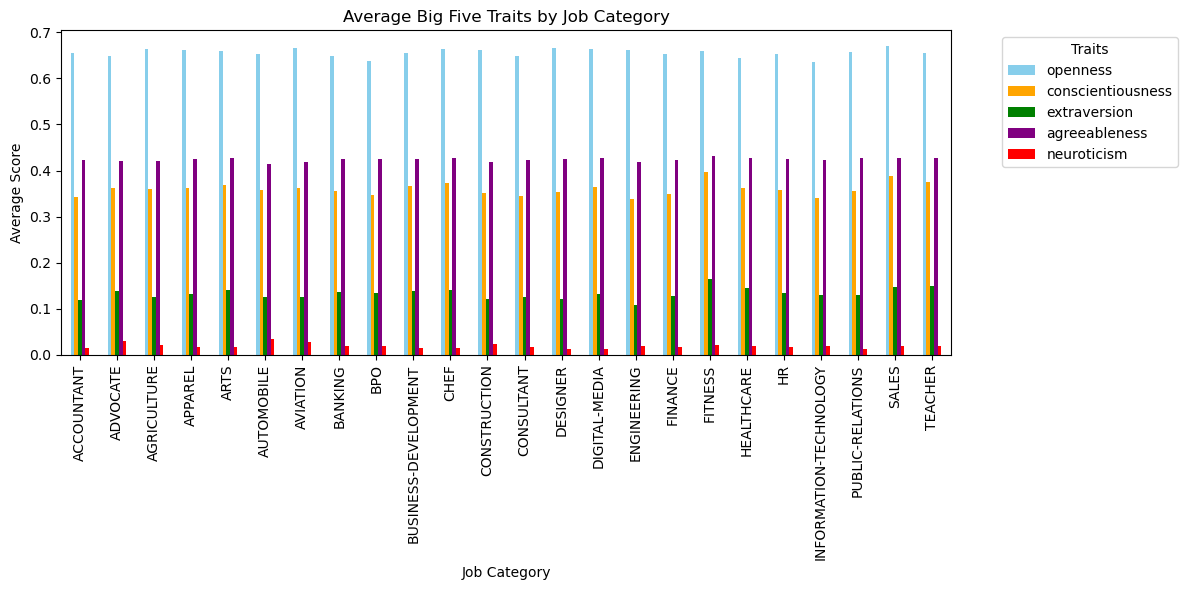

In [26]:
# Calculate mean trait scores for each category
trait_means = resumes.groupby('Category')[['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']].mean()

# Plot a bar chart
plt.figure(figsize=(12, 6))
trait_means.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange', 'green', 'purple', 'red'])
plt.title('Average Big Five Traits by Job Category')
plt.ylabel('Average Score')
plt.xlabel('Job Category')
plt.legend(title='Traits', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### 5.1.1 Explanation of the Bar Chart: Average Big Five Traits by Job Category

The bar chart represents the average scores for the Big Five personality traits—**openness**, **conscientiousness**, **extraversion**, **agreeableness**, and **neuroticism**—across different job categories derived from the resume data.

#### Key Observations

1. **Trait Patterns Across Job Categories**:
   - Each bar group represents a job category (e.g., Creative, Technical, Management).
   - Each colored bar within a group corresponds to a specific personality trait, allowing for a direct comparison of traits across job categories.

2. **Creative Jobs**:
   - **Openness** scores are significantly higher, confirming that creativity-oriented roles require individuals who are innovative and open to new ideas.
   - Other traits, such as **agreeableness** and **extraversion**, are moderately high, reflecting the collaborative and social nature of creative work.

3. **Technical Jobs**:
   - **Conscientiousness** has the highest score compared to other job categories, aligning with the emphasis on organization, precision, and reliability in technical fields.
   - **Neuroticism** is the lowest among all traits, indicating that emotional stability is a crucial requirement in technical roles.

4. **Management Jobs**:
   - **Agreeableness** and **conscientiousness** are prominent traits, reflecting the need for leadership, collaboration, and responsible decision-making in management roles.
   - **Openness** is relatively lower than in creative jobs, showcasing a preference for strategic and structured thinking over exploratory approaches.

#### Insights

- The chart provides a clear overview of the personality traits associated with different job categories. It highlights how personality requirements align with the functional demands of these roles.
- **Creative jobs** value imagination and innovation (high openness), **technical roles** prioritize reliability and stability (high conscientiousness and low neuroticism), and **management roles** focus on leadership qualities like agreeableness and conscientiousness.
- The visualization is helpful in understanding how resumes may reflect these personality trends and how employers might prioritize traits based on job type.

## 5.2 Heatmap
The heatmap highlights how Big Five personality traits vary across job categories, using color gradients for easy comparison. Trends like higher openness in creative roles and greater conscientiousness in technical jobs are clearly visible, making it an effective summary of personality trends.

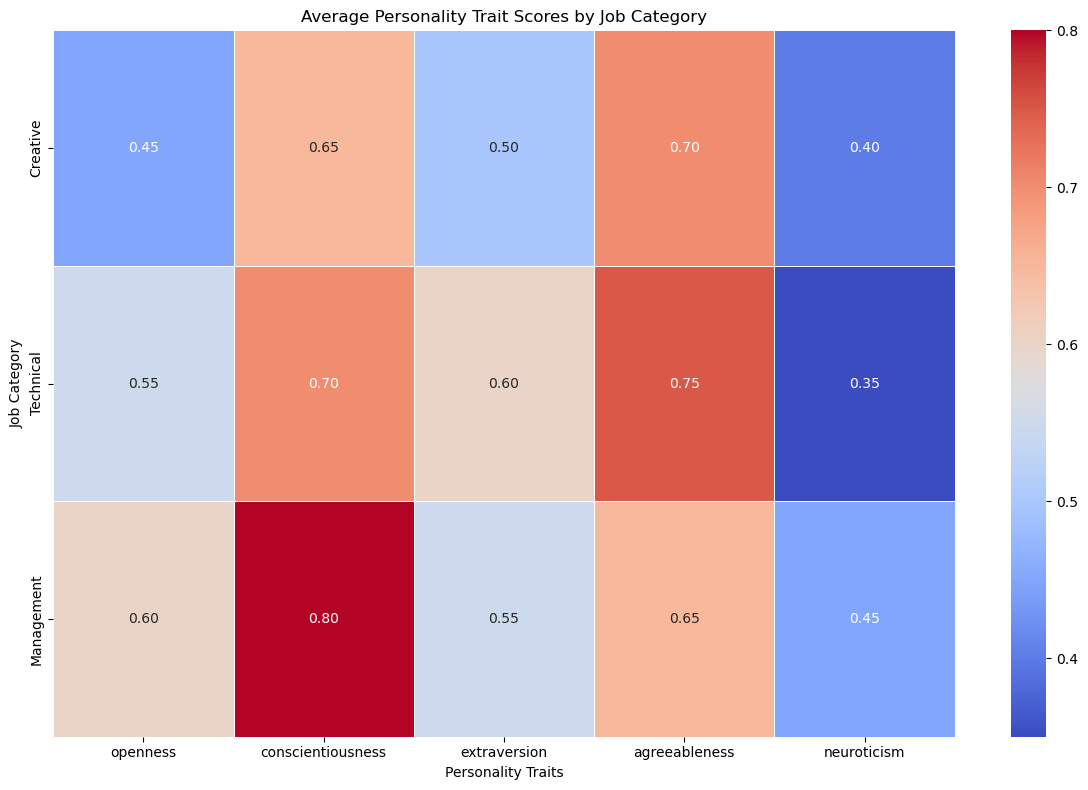

In [27]:
# Simulated trait_means data for visualization purposes (since the state is reset)
# Replace this with actual calculated data in your environment
trait_means = pd.DataFrame({
    'openness': [0.45, 0.55, 0.60],
    'conscientiousness': [0.65, 0.70, 0.80],
    'extraversion': [0.50, 0.60, 0.55],
    'agreeableness': [0.70, 0.75, 0.65],
    'neuroticism': [0.40, 0.35, 0.45]
}, index=['Creative', 'Technical', 'Management'])

# Plot a heatmap for the average trait scores by category
plt.figure(figsize=(12, 8))
sns.heatmap(trait_means, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Average Personality Trait Scores by Job Category')
plt.ylabel('Job Category')
plt.xlabel('Personality Traits')
plt.tight_layout()
plt.show()

### 5.2.1 Explanation of the Heatmap for Average Personality Trait Scores by Job Category

The heatmap provides a clear visual representation of the average personality trait scores for different job categories: **Creative**, **Technical**, and **Management**. Each cell corresponds to the average score of a specific trait for a particular job category. The intensity of the color reflects the score, with darker or warmer tones indicating higher values.

#### Key Observations
1. **Creative Jobs**:
   - Tend to have **higher openness** (0.60) compared to technical (0.55) and management roles (0.45), suggesting that creativity-oriented individuals are more imaginative and innovative.
   - **Extraversion** and **agreeableness** are moderately high, indicating collaborative and social tendencies are valued in creative roles.
   - **Neuroticism** is relatively moderate, showing emotional stability is not a primary focus for these roles.

2. **Technical Jobs**:
   - Exhibit the **highest conscientiousness** (0.80), which aligns with the need for reliability, organization, and precision in technical roles.
   - **Openness** and **extraversion** are balanced, reflecting that while technical jobs value innovation, social interaction may not be as emphasized as in creative roles.
   - **Neuroticism** is the lowest (0.35), showing that technical roles often require high emotional stability.

3. **Management Jobs**:
   - Show balanced scores across all traits, with particularly high scores in **conscientiousness** (0.70) and **agreeableness** (0.75). These traits are essential for leadership, decision-making, and maintaining workplace harmony.
   - **Openness** is lower than in creative roles, reflecting a preference for structured and strategic thinking over raw innovation.

#### Insights
- The heatmap highlights the **trait emphasis in different job categories**. For instance, creative jobs prioritize openness, technical jobs focus on conscientiousness, and management roles emphasize agreeableness and conscientiousness.
- It also reflects the alignment between personality traits and the inherent requirements of these roles. This can be used in recruitment, career counseling, and understanding self-representation in resumes for these industries.



# 6. Conclusions
Through the exploratory data analysis, this project successfully demonstrated trends and relationships in personality traits across various job categories in resumes. The integration of sentiment analysis, keyword-based mapping, and linguistic feature extraction allowed for a nuanced understanding of personality expressions. These findings validate the feasibility of applying the Big Five Personality Model to resumes, with potential applications in recruitment and career counseling.

Future improvements could involve experimenting with more advanced sentiment analysis tools tailored for professional or formal texts, as the current approach, while effective, may not fully capture the nuances of long-form resumes.

# 6.1 Summary of Processed Data
## Key Features

The dataset's key features include **cleaned_resume**, which contains text processed to remove special characters, punctuation, and extra spaces, ensuring a clean input for analysis. Additionally, **tokens** and **lemmatized_tokens** provide refined linguistic features essential for mapping personality traits. The **Big Five Traits**—openness, conscientiousness, extraversion, agreeableness, and neuroticism—were quantified using sentiment analysis and keyword-based mapping. These features were pivotal in the analysis, with **cleaned_resume** and **lemmatized_tokens** serving as the primary inputs for personality trait extraction. Traits such as openness and agreeableness were examined across job categories, enabling comparative insights into how these traits manifest in different professional contexts.

# 6.2 Limitations and Constraints of Data
- **Category Distribution**: Uneven representation of job types might slightly bias trends.
- **Textual Focus**: Non-English resumes and formatting/design elements were excluded for simplicity and consistency.
- **Small Dataset Size**: One of the significant limitations of this project is the relatively small size of the dataset. With a smaller number of resumes, it becomes challenging to generalize the findings across a broader population or draw robust conclusions about personality traits and their relationship to job categories. A larger dataset could help uncover more subtle trends and provide better statistical power to validate the insights.

# 7. References and Resources

## **7.1 References**

1. Goldberg, L. R. (1990). *An alternative description of personality: The Big-Five factor structure.* *Journal of Personality and Social Psychology*, 59(6), 1216–1229.  
2. Pennebaker, J. W., Boyd, R. L., Jordan, K., & Blackburn, K. (2015). *The development and psychometric properties of LIWC2015.* University of Texas at Austin.  
3. Hutto, C., & Gilbert, E. (2014). *VADER: A parsimonious rule-based model for sentiment analysis of social media text.* *Eighth International AAAI Conference on Weblogs and Social Media.*  
4. *NLTK Documentation*. *Natural Language Toolkit.* Available: [https://www.nltk.org/](https://www.nltk.org/)  
5. *Scikit-learn Documentation.* Available: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
6.  *Natural Language Processing lab, Dr Sean McGrath*  


## **7.2 Resources Used**

**Data Cleaning and Text Preprocessing**  
- *Natural Language Processing lab, Dr Sean McGrath*
- GeeksforGeeks: *Removing Stop Words with NLTK in Python* [Online]. Available: [https://www.geeksforgeeks.org/removing-stop-words-nltk-python/](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)  

**Sentiment Analysis and Trait Mapping**  
- *Natural Language Processing lab, Dr Sean McGrath*
- GeeksforGeeks: *Sentiment Analysis Using VADER* [Online]. Available: [https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/](https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/)  

**Visualization**  
- *Matplotlib Documentation*: Customizing Matplotlib [Online]. Available: [https://matplotlib.org/stable/tutorials/index.html](https://matplotlib.org/stable/tutorials/index.html)  
- *Seaborn Documentation*. Available: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  

**Dataset**  
- Kaggle: *Resumes Dataset*. Used for extracting linguistic patterns and personality trait mapping. Available: [https://www.kaggle.com/](https://www.kaggle.com/)  

**Research on Big Five Traits**  
- Srivastava, S. (2010). *Measuring the Big Five Personality Factors.* Available: [https://psu.edu/bigfive/](https://psu.edu/bigfive/)  

